In [293]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Loading datasets
gps = pd.read_csv('GPS_data.csv')
bookings = pd.read_csv('Shipment_bookings.csv')
new_bookings = pd.read_csv('New_bookings.csv')

# Explanatory Data Analysis

In [27]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641662 entries, 0 to 641661
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SHIPMENT_NUMBER   641662 non-null  object 
 1   LAT               641662 non-null  float64
 2   LON               641662 non-null  float64
 3   RECORD_TIMESTAMP  641662 non-null  object 
dtypes: float64(2), object(2)
memory usage: 19.6+ MB


In [29]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PROJECT_ID                          3245 non-null   object 
 1   SHIPMENT_NUMBER                     3245 non-null   object 
 2   CARRIER_DISPLAY_ID                  3245 non-null   object 
 3   VEHICLE_SIZE                        3245 non-null   object 
 4   VEHICLE_BUILD_UP                    3245 non-null   object 
 5   FIRST_COLLECTION_POST_CODE          3244 non-null   object 
 6   LAST_DELIVERY_POST_CODE             3241 non-null   object 
 7   FIRST_COLLECTION_LATITUDE           3245 non-null   float64
 8   FIRST_COLLECTION_LONGITUDE          3245 non-null   float64
 9   LAST_DELIVERY_LATITUDE              3245 non-null   float64
 10  LAST_DELIVERY_LONGITUDE             3245 non-null   float64
 11  FIRST_COLLECTION_SCHEDULE_EARLIEST  3245 no

In [31]:
new_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SHIPMENT_NUMBER                     1000 non-null   object 
 1   SHIPPER_ID                          1000 non-null   object 
 2   CARRIER_ID                          1000 non-null   object 
 3   VEHICLE_SIZE                        1000 non-null   object 
 4   VEHICLE_BUILD_UP                    1000 non-null   object 
 5   FIRST_COLLECTION_POST_CODE          998 non-null    object 
 6   LAST_DELIVERY_POST_CODE             1000 non-null   object 
 7   FIRST_COLLECTION_LATITUDE           1000 non-null   float64
 8   FIRST_COLLECTION_LONGITUDE          1000 non-null   float64
 9   LAST_DELIVERY_LATITUDE              1000 non-null   float64
 10  LAST_DELIVERY_LONGITUDE             1000 non-null   float64
 11  FIRST_COLLECTION_SCHEDULE_EARLIEST  1000 non

In [252]:
# Correcting data types - datetime

def correct_time(time):
    time = pd.to_datetime(time)
    
    if time.strftime('%z') == '+0000':
        time = time+pd.Timedelta(hours=1)
        
    return time.strftime('%Y-%m-%d %H:%M:%S')


gps['RECORD_TIMESTAMP'] = pd.to_datetime(gps['RECORD_TIMESTAMP'].apply(correct_time))

for col in ['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST', 
            'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST']:
    
    bookings[col] = pd.to_datetime(bookings[col].apply(correct_time))
    new_bookings[col] = pd.to_datetime(new_bookings[col].apply(correct_time))


In [253]:
gps.head()

SHIPMENT_NUMBER        LAT       LON    RECORD_TIMESTAMP
0  SEZHUK-230918-245388  53.291931 -1.072948 2023-10-09 19:25:00
1  SEZHUK-230918-245388  53.400404 -1.078563 2023-10-09 19:40:00
2  SEZHUK-230918-245388  53.574182 -1.215761 2023-10-09 19:55:00
3  SEZHUK-230918-245388  53.706805 -1.336503 2023-10-09 20:10:00
4  SEZHUK-230918-245388  53.747501 -1.640298 2023-10-09 20:25:00

In [254]:
bookings.head()

PROJECT_ID       SHIPMENT_NUMBER  \
0  5456fcfa-5b0c-428e-b322-240d508b6660  SEZHUK-231005-250448   
1  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231217-275004   
2  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231210-272018   
3  40415fe3-e446-4d1e-b141-3698b0dc47f3  SEZHUK-231211-272127   
4  39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231025-256168   

  CARRIER_DISPLAY_ID  VEHICLE_SIZE            VEHICLE_BUILD_UP  \
0         CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
1         CAUK000660  Tractor Unit                    Box 44ft   
2         CAUK000435  Tractor Unit                    Box 44ft   
3         CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
4         CAUK000155  Tractor Unit                Curtain Side   

  FIRST_COLLECTION_POST_CODE LAST_DELIVERY_POST_CODE  \
0                   PE29 2XR                EH48 2FB   
1                    BD5 8LZ                RG19 4BQ   
2                    BD5 8LZ                 EN3 7QP   
3                   HP22 5BL                NG31 7UH   
4                   CV23 8BQ                 G75 0ZZ   

   FIRST_COLLECTION_LATITUDE  FIRST_COLLECTION_LONGITUDE  \
0                  52.315672                   -0.157664   
1                  53.764125                   -1.740145   
2                  53.767302                   -1.746560   
3                  51.779657                   -0.772897   
4                  52.334853                   -1.180450   

   LAST_DELIVERY_LATITUDE  LAST_DELIVERY_LONGITUDE  \
0               55.877803                -3.648558   
1               51.398851                -1.231993   
2               51.660700                -0.022247   
3               52.888113                -0.634948   
4               55.735089                -4.168719   

  FIRST_COLLECTION_SCHEDULE_EARLIEST FIRST_COLLECTION_SCHEDULE_LATEST  \
0                2023-10-06 10:45:00              2023-10-06 11:00:00   
1                2023-12-19 15:20:00              2023-12-19 17:00:00   
2                2023-12-14 02:20:00              2023-12-14 04:00:00   
3                2023-12-13 10:00:00              2023-12-13 10:30:00   
4                2023-11-07 15:00:00              2023-11-07 16:00:00   

  LAST_DELIVERY_SCHEDULE_EARLIEST LAST_DELIVERY_SCHEDULE_LATEST  
0             2023-10-09 10:55:00           2023-10-09 11:25:00  
1             2023-12-20 07:00:00           2023-12-20 09:56:00  
2             2023-12-14 08:03:00           2023-12-14 11:43:00  
3             2023-12-13 16:30:00           2023-12-13 17:00:00  
4             2023-11-08 00:00:00           2023-11-08 00:59:00

In [255]:
new_bookings.head()

SHIPMENT_NUMBER                            SHIPPER_ID  CARRIER_ID  \
0  SEZHUK-240118-283413  ee7cbc7b-4f14-44ac-9c6e-086d70a27141  CAUK000872   
1  SEZHUK-240111-281159  192cd5b5-978c-4681-b206-2f4d04e081ec  CAUK000876   
2  SEZHUK-240110-280958  ee7cbc7b-4f14-44ac-9c6e-086d70a27141  CAUK000872   
3  SEZHUK-240115-282151  3244246f-e37c-4ba4-b9b3-61416a4449ae  CAUK000250   
4  SEZHUK-240110-280768  3244246f-e37c-4ba4-b9b3-61416a4449ae  CAUK000250   

   VEHICLE_SIZE            VEHICLE_BUILD_UP FIRST_COLLECTION_POST_CODE  \
0  Tractor Unit                         Box                     DUBLIN   
1  Tractor Unit  Curtain-Side 13.6M Trailer                   LS24 9SD   
2  Tractor Unit  Curtain-Side 13.6M Trailer                     DUBLIN   
3  Tractor Unit  Curtain-Side 13.6M Trailer                    S80 3FY   
4  Tractor Unit  Curtain-Side 13.6M Trailer                    S80 3FY   

  LAST_DELIVERY_POST_CODE  FIRST_COLLECTION_LATITUDE  \
0                 DN3 3FF                  53.407411   
1                BT26 6JJ                  53.882244   
2                 DN3 3FF                  53.407411   
3                  DUBLIN                  53.293393   
4                BT36 7LQ                  53.293393   

   FIRST_COLLECTION_LONGITUDE  LAST_DELIVERY_LATITUDE  \
0                   -6.238118               53.537912   
1                   -1.267537               54.474078   
2                   -6.238118               53.537912   
3                   -1.074008               53.294121   
4                   -1.074008               54.664518   

   LAST_DELIVERY_LONGITUDE FIRST_COLLECTION_SCHEDULE_EARLIEST  \
0                -1.033570                2024-01-18 19:00:00   
1                -6.104285                2024-01-12 11:00:00   
2                -1.033570                2024-01-11 16:03:00   
3                -6.441900                2024-01-16 07:00:00   
4                -5.932184                2024-01-11 07:00:00   

  FIRST_COLLECTION_SCHEDULE_LATEST LAST_DELIVERY_SCHEDULE_EARLIEST  \
0              2024-01-19 00:00:00             2024-01-19 13:00:00   
1              2024-01-16 08:00:00             2024-01-16 08:30:00   
2              2024-01-11 16:33:00             2024-01-12 15:33:00   
3              2024-01-16 07:59:00             2024-01-18 12:01:00   
4              2024-01-11 07:59:00             2024-01-15 08:25:00   

  LAST_DELIVERY_SCHEDULE_LATEST  
0           2024-01-19 14:00:00  
1           2024-01-16 09:00:00  
2           2024-01-12 16:03:00  
3           2024-01-18 12:31:00  
4           2024-01-15 08:55:00

--------

<AxesSubplot:>

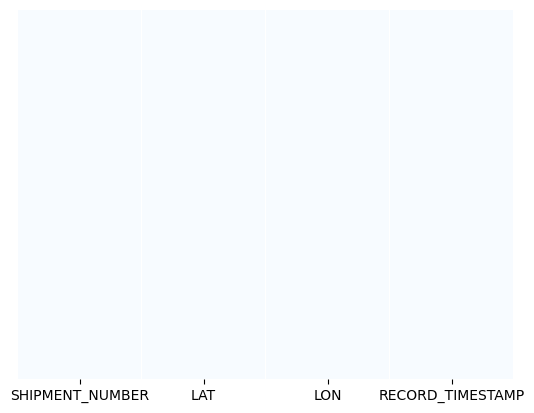

In [256]:
# Checking the possible null values
sns.heatmap(gps.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:>

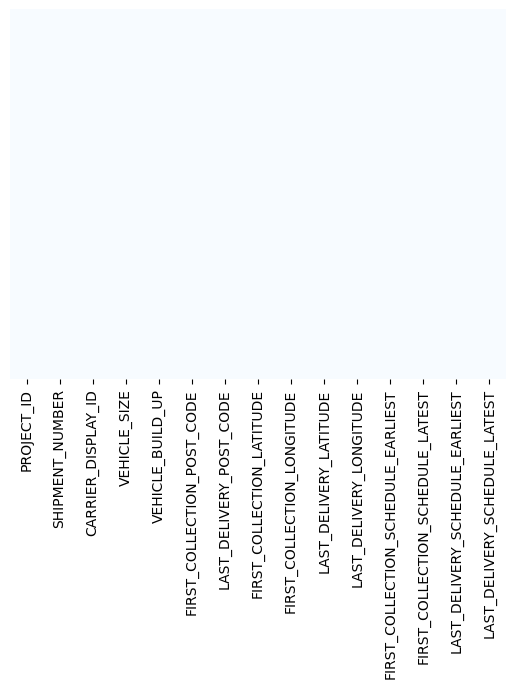

In [257]:
sns.heatmap(bookings.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:>

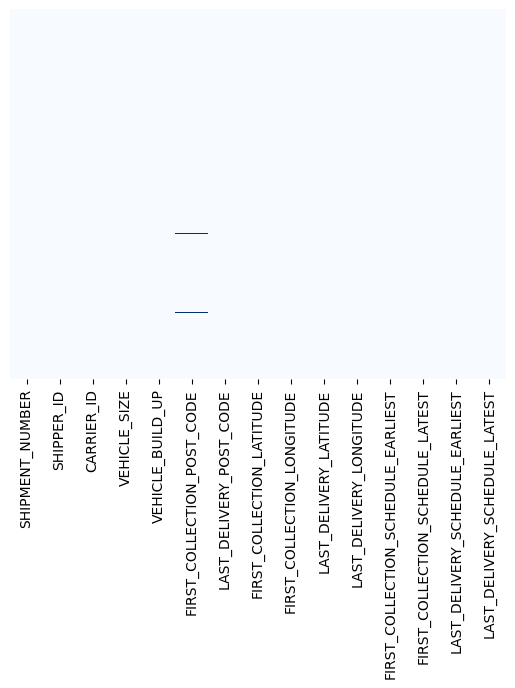

In [258]:
sns.heatmap(new_bookings.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [259]:
new_bookings.isnull().sum() # ignoring this at the moment since they can be null from the description

SHIPMENT_NUMBER                       0
SHIPPER_ID                            0
CARRIER_ID                            0
VEHICLE_SIZE                          0
VEHICLE_BUILD_UP                      0
FIRST_COLLECTION_POST_CODE            2
LAST_DELIVERY_POST_CODE               0
FIRST_COLLECTION_LATITUDE             0
FIRST_COLLECTION_LONGITUDE            0
LAST_DELIVERY_LATITUDE                0
LAST_DELIVERY_LONGITUDE               0
FIRST_COLLECTION_SCHEDULE_EARLIEST    0
FIRST_COLLECTION_SCHEDULE_LATEST      0
LAST_DELIVERY_SCHEDULE_EARLIEST       0
LAST_DELIVERY_SCHEDULE_LATEST         0
dtype: int64

In [260]:
# Checking the possible duplicate data entries

print(gps.duplicated().sum())
print(bookings.duplicated().sum())
print(new_bookings.duplicated().sum())

0
0
0


# Question 1 - Finding the Percentage of Late Deliveries

- Time period is between October 1st and December 31st, 2023
- On-time delivery means the delivery is arriving no later than 30 mins of scheduled delivery time.
- Using the latest gps location, assuming if the parcel is delivered, the carrier stopped sharing gps locations for the delivered shipment_number.

In [263]:
latest_gps = gps.loc[gps.groupby('SHIPMENT_NUMBER').RECORD_TIMESTAMP.idxmax()]

df_merged = bookings.merge(latest_gps, how='left', on='SHIPMENT_NUMBER')

# filtering only the required time interval
mask = (df_merged['RECORD_TIMESTAMP'] >= '2023-10-1') & (df_merged['RECORD_TIMESTAMP'] <= '2023-12-31')
df_masked = df_merged.loc[mask]

df_masked

PROJECT_ID       SHIPMENT_NUMBER  \
0     5456fcfa-5b0c-428e-b322-240d508b6660  SEZHUK-231005-250448   
1     eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231217-275004   
2     eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231210-272018   
3     40415fe3-e446-4d1e-b141-3698b0dc47f3  SEZHUK-231211-272127   
4     39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231025-256168   
...                                    ...                   ...   
3240  433732b1-4db6-4969-985d-710c0033eeb4  SEZHUK-231122-265206   
3241  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231014-253126   
3242  433732b1-4db6-4969-985d-710c0033eeb4  SEZHUK-231206-270513   
3243  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231117-264094   
3244  66a23663-0195-46f2-a5e4-da256bcba47b  SEZHUK-230925-247295   

     CARRIER_DISPLAY_ID  VEHICLE_SIZE            VEHICLE_BUILD_UP  \
0            CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
1            CAUK000660  Tractor Unit                    Box 44ft   
2            CAUK000435  Tractor Unit                    Box 44ft   
3            CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
4            CAUK000155  Tractor Unit                Curtain Side   
...                 ...           ...                         ...   
3240         CAUK000912      3.5T Van                         Box   
3241         CAUK000435  Tractor Unit                    Box 44ft   
3242         CAUK000912      3.5T Van                         Box   
3243         CAUK000390  Tractor Unit                    Box 44ft   
3244         CAUK001009      3.5T Van                     LWB Van   

     FIRST_COLLECTION_POST_CODE LAST_DELIVERY_POST_CODE  \
0                      PE29 2XR                EH48 2FB   
1                       BD5 8LZ                RG19 4BQ   
2                       BD5 8LZ                 EN3 7QP   
3                      HP22 5BL                NG31 7UH   
4                      CV23 8BQ                 G75 0ZZ   
...                         ...                     ...   
3240                    BD5 8LZ                 LE3 8DX   
3241                   AL10 8XF                DE74 2HL   
3242                    S35 2PW                 LE3 8DX   
3243                    BD5 8LZ                 HP2 7PZ   
3244                   DE74 2TR                 EN1 1TX   

      FIRST_COLLECTION_LATITUDE  FIRST_COLLECTION_LONGITUDE  \
0                     52.315672                   -0.157664   
1                     53.764125                   -1.740145   
2                     53.767302                   -1.746560   
3                     51.779657                   -0.772897   
4                     52.334853                   -1.180450   
...                         ...                         ...   
3240                  53.766832                   -1.740516   
3241                  51.741040                   -0.218368   
3242                  53.476537                   -1.471065   
3243                  53.763558                   -1.739636   
3244                  52.829374                   -1.332134   

      LAST_DELIVERY_LATITUDE  LAST_DELIVERY_LONGITUDE  \
0                  55.877803                -3.648558   
1                  51.398851                -1.231993   
2                  51.660700                -0.022247   
3                  52.888113                -0.634948   
4                  55.735089                -4.168719   
...                      ...                      ...   
3240               52.641456                -1.216005   
3241               52.849282                -1.354253   
3242               52.641456                -1.216005   
3243               51.771841                -0.439918   
3244               51.650981                -0.054718   

     FIRST_COLLECTION_SCHEDULE_EARLIEST FIRST_COLLECTION_SCHEDULE_LATEST  \
0                   2023-10-06 10:45:00              2023-10-06 11:00:00   
1                   2023-12-19 15:20:00              2023-12-19 17:00:00   
2      

- Since the data does not provide for the shipment's delivery status, we will try to understand if the shipment is delivered by using gps location of the delivery and its distance to delivery location.
- Assuming if the location of the carrier is less than 50 meters from the delivery location, the carrier met the point and delivered the item.

In [359]:
def distance(current_lat, current_lon, lat, lon):
    from math import sin, cos, sqrt, atan2, radians
    R = 6373.0
    
    current_lat = radians(current_lat)
    current_lon = radians(current_lon)
    
    lat = radians(lat)
    lon = radians(lon)
    
    dlat = current_lat - lat
    dlon = current_lon - lon
    
    a = sin(dlat / 2)**2 + cos(lat) * cos(current_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R*c #kilometers

def location(df):

    #distance_home = distance(df.LAT, df.LON, df.FIRST_COLLECTION_LATITUDE, df.FIRST_COLLECTION_LONGITUDE)
    distance_arrival = distance(df.LAT, df.LON, df.LAST_DELIVERY_LATITUDE, df.LAST_DELIVERY_LONGITUDE)   
    
    #if distance_home < 0.05: return 'HOME'
    if distance_arrival < 0.05: return 'DELIVERED'
    else: return 'OTHER'
    
    

In [294]:
df_masked['STATUS'] = df_masked.apply(lambda x: location(x), axis=1)

In [268]:
df_masked

PROJECT_ID       SHIPMENT_NUMBER  \
0     5456fcfa-5b0c-428e-b322-240d508b6660  SEZHUK-231005-250448   
1     eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231217-275004   
2     eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231210-272018   
3     40415fe3-e446-4d1e-b141-3698b0dc47f3  SEZHUK-231211-272127   
4     39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231025-256168   
...                                    ...                   ...   
3240  433732b1-4db6-4969-985d-710c0033eeb4  SEZHUK-231122-265206   
3241  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231014-253126   
3242  433732b1-4db6-4969-985d-710c0033eeb4  SEZHUK-231206-270513   
3243  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231117-264094   
3244  66a23663-0195-46f2-a5e4-da256bcba47b  SEZHUK-230925-247295   

     CARRIER_DISPLAY_ID  VEHICLE_SIZE            VEHICLE_BUILD_UP  \
0            CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
1            CAUK000660  Tractor Unit                    Box 44ft   
2            CAUK000435  Tractor Unit                    Box 44ft   
3            CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
4            CAUK000155  Tractor Unit                Curtain Side   
...                 ...           ...                         ...   
3240         CAUK000912      3.5T Van                         Box   
3241         CAUK000435  Tractor Unit                    Box 44ft   
3242         CAUK000912      3.5T Van                         Box   
3243         CAUK000390  Tractor Unit                    Box 44ft   
3244         CAUK001009      3.5T Van                     LWB Van   

     FIRST_COLLECTION_POST_CODE LAST_DELIVERY_POST_CODE  \
0                      PE29 2XR                EH48 2FB   
1                       BD5 8LZ                RG19 4BQ   
2                       BD5 8LZ                 EN3 7QP   
3                      HP22 5BL                NG31 7UH   
4                      CV23 8BQ                 G75 0ZZ   
...                         ...                     ...   
3240                    BD5 8LZ                 LE3 8DX   
3241                   AL10 8XF                DE74 2HL   
3242                    S35 2PW                 LE3 8DX   
3243                    BD5 8LZ                 HP2 7PZ   
3244                   DE74 2TR                 EN1 1TX   

      FIRST_COLLECTION_LATITUDE  FIRST_COLLECTION_LONGITUDE  \
0                     52.315672                   -0.157664   
1                     53.764125                   -1.740145   
2                     53.767302                   -1.746560   
3                     51.779657                   -0.772897   
4                     52.334853                   -1.180450   
...                         ...                         ...   
3240                  53.766832                   -1.740516   
3241                  51.741040                   -0.218368   
3242                  53.476537                   -1.471065   
3243                  53.763558                   -1.739636   
3244                  52.829374                   -1.332134   

      LAST_DELIVERY_LATITUDE  LAST_DELIVERY_LONGITUDE  \
0                  55.877803                -3.648558   
1                  51.398851                -1.231993   
2                  51.660700                -0.022247   
3                  52.888113                -0.634948   
4                  55.735089                -4.168719   
...                      ...                      ...   
3240               52.641456                -1.216005   
3241               52.849282                -1.354253   
3242               52.641456                -1.216005   
3243               51.771841                -0.439918   
3244               51.650981                -0.054718   

     FIRST_COLLECTION_SCHEDULE_EARLIEST FIRST_COLLECTION_SCHEDULE_LATEST  \
0                   2023-10-06 10:45:00              2023-10-06 11:00:00   
1                   2023-12-19 15:20:00              2023-12-19 17:00:00   
2      

In [269]:
def on_time(latest_time, scheduled_time):
    return scheduled_time + pd.Timedelta(minutes=30) >= latest_time

mean_on_time = df_masked.apply(lambda x: on_time(x['RECORD_TIMESTAMP'], x['LAST_DELIVERY_SCHEDULE_LATEST']), 
                                 axis=1).mean()

print('Percentage of on-time shipment deliveries:', "{:.2f}".format(mean_on_time*100), '%')

Percentage of on-time shipment deliveries: 62.62 %


In [285]:
df_masked.apply(lambda x: on_time(x['RECORD_TIMESTAMP'], x['LAST_DELIVERY_SCHEDULE_LATEST']), 
                                 axis=1)

0        True
1        True
2        True
3       False
4       False
        ...  
3240    False
3241    False
3242     True
3243     True
3244     True
Length: 3240, dtype: bool

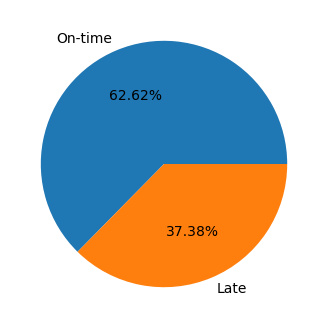

In [305]:
df_masked['DELIVERY_STATUS'] = np.where(df_masked.apply(lambda x: 
                            on_time(x['RECORD_TIMESTAMP'], x['LAST_DELIVERY_SCHEDULE_LATEST']), axis=1), 
                            'On-time', 'Late')

plt.figure(figsize=(4,4))

plt.pie(df_masked.DELIVERY_STATUS.value_counts(), labels=df_masked.DELIVERY_STATUS.value_counts().index, 
        autopct='%1.2f%%')
plt.show()

----

# Question 2 - Potantial Late Delivery 

In [306]:
df_masked.head()

PROJECT_ID       SHIPMENT_NUMBER  \
0  5456fcfa-5b0c-428e-b322-240d508b6660  SEZHUK-231005-250448   
1  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231217-275004   
2  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231210-272018   
3  40415fe3-e446-4d1e-b141-3698b0dc47f3  SEZHUK-231211-272127   
4  39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231025-256168   

  CARRIER_DISPLAY_ID  VEHICLE_SIZE            VEHICLE_BUILD_UP  \
0         CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
1         CAUK000660  Tractor Unit                    Box 44ft   
2         CAUK000435  Tractor Unit                    Box 44ft   
3         CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
4         CAUK000155  Tractor Unit                Curtain Side   

  FIRST_COLLECTION_POST_CODE LAST_DELIVERY_POST_CODE  \
0                   PE29 2XR                EH48 2FB   
1                    BD5 8LZ                RG19 4BQ   
2                    BD5 8LZ                 EN3 7QP   
3                   HP22 5BL                NG31 7UH   
4                   CV23 8BQ                 G75 0ZZ   

   FIRST_COLLECTION_LATITUDE  FIRST_COLLECTION_LONGITUDE  \
0                  52.315672                   -0.157664   
1                  53.764125                   -1.740145   
2                  53.767302                   -1.746560   
3                  51.779657                   -0.772897   
4                  52.334853                   -1.180450   

   LAST_DELIVERY_LATITUDE  LAST_DELIVERY_LONGITUDE  \
0               55.877803                -3.648558   
1               51.398851                -1.231993   
2               51.660700                -0.022247   
3               52.888113                -0.634948   
4               55.735089                -4.168719   

  FIRST_COLLECTION_SCHEDULE_EARLIEST FIRST_COLLECTION_SCHEDULE_LATEST  \
0                2023-10-06 10:45:00              2023-10-06 11:00:00   
1                2023-12-19 15:20:00              2023-12-19 17:00:00   
2                2023-12-14 02:20:00              2023-12-14 04:00:00   
3                2023-12-13 10:00:00              2023-12-13 10:30:00   
4                2023-11-07 15:00:00              2023-11-07 16:00:00   

  LAST_DELIVERY_SCHEDULE_EARLIEST LAST_DELIVERY_SCHEDULE_LATEST        LAT  \
0             2023-10-09 10:55:00           2023-10-09 11:25:00  52.316544   
1             2023-12-20 07:00:00           2023-12-20 09:56:00  53.745423   
2             2023-12-14 08:03:00           2023-12-14 11:43:00  51.659889   
3             2023-12-13 16:30:00           2023-12-13 17:00:00  52.889862   
4             2023-11-08 00:00:00           2023-11-08 00:59:00  55.845446   

        LON    RECORD_TIMESTAMP STATUS DELIVERY_STATUS  
0 -0.157263 2023-10-06 10:24:00  OTHER         On-time  
1 -1.702855 2023-12-20 05:08:00  OTHER         On-time  
2 -0.024926 2023-12-14 11:18:00  OTHER         On-time  
3 -0.634389 2023-12-13 18:22:00  OTHER            Late  
4 -3.880531 2023-11-08 04:53:00  OTHER            Late

- The logic here is to check for the latest updated GPS location for each carrier and detect if they are going to be late for their delivery.

- The GPS data is dynamic. So, we don't need to look for the previously updated location information. If the carrier is detected to be delayed, they will be notified in their formerly updated location.

In [307]:

km_to_mile = 0.621371

df_masked['DISTANCE_TO_DELIVERY'] = df_masked.apply(lambda x: distance(x.LAT, x.LON, 
                                    x.LAST_DELIVERY_LATITUDE, x.LAST_DELIVERY_LONGITUDE)*km_to_mile, axis=1)


In [309]:
# Assuming the carrier is driving 30 mile/h, we will try to detect if the carrier can make it on time or not

def late_delivery(row):
    if pd.Timedelta(hours = row['DISTANCE_TO_DELIVERY']/30) + row['RECORD_TIMESTAMP'] > row['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30):
        return 'Notify'
    else: return 'Expected to be delivered on time'


df_masked['LATE_NOTIFICATION'] = df_masked.apply(late_delivery, axis=1)


In [311]:
late_delivery = df_masked[df_masked['LATE_NOTIFICATION'] == 'Notify']

print('Shipments expected to delay delivery:')
late_delivery

Shipments expected to delay delivery:


PROJECT_ID       SHIPMENT_NUMBER  \
1     eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231217-275004   
3     40415fe3-e446-4d1e-b141-3698b0dc47f3  SEZHUK-231211-272127   
4     39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231025-256168   
5     66a23663-0195-46f2-a5e4-da256bcba47b  SEZHUK-231109-261150   
6     39a4e234-5d35-4d94-8e8a-b8bf6fe13953  SEZHUK-231120-264422   
...                                    ...                   ...   
3231  2aac1ee1-5cab-42c8-9d2f-ec995a63c14f  SEZHUK-231220-276105   
3234  2aac1ee1-5cab-42c8-9d2f-ec995a63c14f  SEZHUK-231214-273991   
3236  2aac1ee1-5cab-42c8-9d2f-ec995a63c14f  SEZHUK-231221-276349   
3240  433732b1-4db6-4969-985d-710c0033eeb4  SEZHUK-231122-265206   
3241  eb7a9df0-4875-43d8-9060-c79c35eae2fb  SEZHUK-231014-253126   

     CARRIER_DISPLAY_ID  VEHICLE_SIZE            VEHICLE_BUILD_UP  \
1            CAUK000660  Tractor Unit                    Box 44ft   
3            CAUK000096  Tractor Unit  Curtain-Side 13.6M Trailer   
4            CAUK000155  Tractor Unit                Curtain Side   
5            CAUK001009      3.5T Van                     LWB Van   
6            CAUK000155  Tractor Unit                Curtain Side   
...                 ...           ...                         ...   
3231         CAUK000192  Tractor Unit  Curtain-Side 13.6M Trailer   
3234         CAUK000192  Tractor Unit  Curtain-Side 13.6M Trailer   
3236         CAUK001047  Tractor Unit  Curtain-Side 13.6M Trailer   
3240         CAUK000912      3.5T Van                         Box   
3241         CAUK000435  Tractor Unit                    Box 44ft   

     FIRST_COLLECTION_POST_CODE LAST_DELIVERY_POST_CODE  \
1                       BD5 8LZ                RG19 4BQ   
3                      HP22 5BL                NG31 7UH   
4                      CV23 8BQ                 G75 0ZZ   
5                      NP10 9DQ                DE74 2TR   
6                      CV23 8BQ                 ML1 4UY   
...                         ...                     ...   
3231                   GL16 8JB                 S80 3EG   
3234                   GL16 8JB                 S80 3EG   
3236                   GL16 8JB                 S80 3EG   
3240                    BD5 8LZ                 LE3 8DX   
3241                   AL10 8XF                DE74 2HL   

      FIRST_COLLECTION_LATITUDE  FIRST_COLLECTION_LONGITUDE  \
1                     53.764125                   -1.740145   
3                     51.779657                   -0.772897   
4                     52.334853                   -1.180450   
5                     51.582459                   -3.043825   
6                     52.334853                   -1.180450   
...                         ...                         ...   
3231                  51.785961                   -2.619676   
3234                  51.785961                   -2.619676   
3236                  51.785961                   -2.619676   
3240                  53.766832                   -1.740516   
3241                  51.741040                   -0.218368   

      LAST_DELIVERY_LATITUDE  ...  FIRST_COLLECTION_SCHEDULE_LATEST  \
1                  51.398851  ...               2023-12-19 17:00:00   
3                  52.888113  ...               2023-12-13 10:30:00   
4                  55.735089  ...               2023-11-07 16:00:00   
5                  52.829374  ...               2023-11-25 10:30:00   
6                  55.825996  ...               2023-12-08 18:00:00   
...                      ...  ...                               ...   
3231               53.295391  ...               2023-12-21 11:47:00   
3234               53.295391  ...               2023-12-15 15:32:00   
3236               53.295391  ...               2023-12-22 16:02:00   
3240               52.641456  ...               2023-12-02 02:00:00   
3241               52.849282  ...               2023-10-15 14:55:01   

     LAST_DELIVERY_SCHEDULE_EARLIEST LAST_DELIVERY_SCHEDULE_LATEST 

- It is general to send a notification of expected late delivery to the carrier during their earlieast delivery schedule. In this data LAST_DELIVERY_SCHEDULE_EARLIEST.
- Doing this, the carrier is notified beforehand and have time to arrange their schedule to meet the delivery on-time.

In [337]:
late_notification.iloc[0,1]

[('SEZHUK-231212-272534',
  Timestamp('2023-12-12 20:00:00'),
  0.09926823918056973)]

In [344]:
late_notification = late_delivery.groupby('PROJECT_ID').apply(lambda x: 
                    list(zip(x['SHIPMENT_NUMBER'], x['LAST_DELIVERY_SCHEDULE_EARLIEST'], x['DISTANCE_TO_DELIVERY']))).reset_index(name='Notification')


for i, r in late_notification.iterrows():
    print('Expected Late Delivery:', r['PROJECT_ID'])
    for shipment, notification_time, distance in r['Notification']:
        print('- Shipment Number:', shipment, '\n- Late Delivery Notification Time:', 
              notification_time, '\n- Distance to the Delivery Location:', distance)
    print()

Expected Late Delivery: 09585ac3-30ad-4115-b56c-878a25db4b76
- Shipment Number: SEZHUK-231212-272534 
- Late Delivery Notification Time: 2023-12-12 20:00:00 
- Distance to the Delivery Location: 0.09926823918056973

Expected Late Delivery: 192cd5b5-978c-4681-b206-2f4d04e081ec
- Shipment Number: SEZHUK-231114-262627 
- Late Delivery Notification Time: 2023-11-16 12:00:00 
- Distance to the Delivery Location: 21.49977662365562
- Shipment Number: SEZHUK-231127-266920 
- Late Delivery Notification Time: 2023-11-29 06:35:00 
- Distance to the Delivery Location: 0.11230793264998938
- Shipment Number: SEZHUK-231115-263171 
- Late Delivery Notification Time: 2023-11-17 17:30:00 
- Distance to the Delivery Location: 6.228928982129479
- Shipment Number: SEZHUK-231115-263131 
- Late Delivery Notification Time: 2023-11-17 09:50:00 
- Distance to the Delivery Location: 0.17817604149056826
- Shipment Number: SEZHUK-231108-260557 
- Late Delivery Notification Time: 2023-11-10 10:30:00 
- Distance to 

-----

# Question 3 - Predict Future Delays for “new_bookings.csv”

In [346]:
df_masked.columns

Index(['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST', 'LAT', 'LON', 'RECORD_TIMESTAMP',
       'STATUS', 'DELIVERY_STATUS', 'DISTANCE_TO_DELIVERY',
       'LATE_NOTIFICATION'],
      dtype='object')

In [347]:
new_bookings.columns

Index(['SHIPMENT_NUMBER', 'SHIPPER_ID', 'CARRIER_ID', 'VEHICLE_SIZE',
       'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE',
       'LAST_DELIVERY_POST_CODE', 'FIRST_COLLECTION_LATITUDE',
       'FIRST_COLLECTION_LONGITUDE', 'LAST_DELIVERY_LATITUDE',
       'LAST_DELIVERY_LONGITUDE', 'FIRST_COLLECTION_SCHEDULE_EARLIEST',
       'FIRST_COLLECTION_SCHEDULE_LATEST', 'LAST_DELIVERY_SCHEDULE_EARLIEST',
       'LAST_DELIVERY_SCHEDULE_LATEST'],
      dtype='object')

### Pre-processing

In [361]:
X_train = df_masked.drop(columns = ['PROJECT_ID', 'SHIPMENT_NUMBER', 'CARRIER_DISPLAY_ID', 'FIRST_COLLECTION_POST_CODE',
                          'LAST_DELIVERY_POST_CODE', 'LAT', 'LON','RECORD_TIMESTAMP', 'STATUS', 'DELIVERY_STATUS',
                          'DISTANCE_TO_DELIVERY', 'LATE_NOTIFICATION'])

y_train = df_masked['DELIVERY_STATUS']

In [369]:
y_train = y_train.apply(lambda x: 1 if x == 'On-time' else 0)

In [363]:
X_test = new_bookings.drop(columns = ['SHIPMENT_NUMBER', 'SHIPPER_ID', 'CARRIER_ID', 'FIRST_COLLECTION_POST_CODE',
                                 'LAST_DELIVERY_POST_CODE'])

In [365]:
X_train['DISTANCE'] = X_train.apply(lambda x: distance(
                                    x.FIRST_COLLECTION_LATITUDE, x.FIRST_COLLECTION_LONGITUDE, 
                                    x.LAST_DELIVERY_LATITUDE, x.LAST_DELIVERY_LONGITUDE)*km_to_mile, axis=1)

X_test['DISTANCE'] = X_test.apply(lambda x: distance(
                                    x.FIRST_COLLECTION_LATITUDE, x.FIRST_COLLECTION_LONGITUDE, 
                                    x.LAST_DELIVERY_LATITUDE, x.LAST_DELIVERY_LONGITUDE)*km_to_mile, axis=1)

In [371]:
X_train['EXPECTED_DELIVERY_TIME'] = X_train['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30)
X_test['EXPECTED_DELIVERY_TIME'] = X_test['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30)

In [372]:
X_train.head()

VEHICLE_SIZE            VEHICLE_BUILD_UP  FIRST_COLLECTION_LATITUDE  \
0  Tractor Unit  Curtain-Side 13.6M Trailer                  52.315672   
1  Tractor Unit                    Box 44ft                  53.764125   
2  Tractor Unit                    Box 44ft                  53.767302   
3  Tractor Unit  Curtain-Side 13.6M Trailer                  51.779657   
4  Tractor Unit                Curtain Side                  52.334853   

   FIRST_COLLECTION_LONGITUDE  LAST_DELIVERY_LATITUDE  \
0                   -0.157664               55.877803   
1                   -1.740145               51.398851   
2                   -1.746560               51.660700   
3                   -0.772897               52.888113   
4                   -1.180450               55.735089   

   LAST_DELIVERY_LONGITUDE FIRST_COLLECTION_SCHEDULE_EARLIEST  \
0                -3.648558                2023-10-06 10:45:00   
1                -1.231993                2023-12-19 15:20:00   
2                -0.022247                2023-12-14 02:20:00   
3                -0.634948                2023-12-13 10:00:00   
4                -4.168719                2023-11-07 15:00:00   

  FIRST_COLLECTION_SCHEDULE_LATEST LAST_DELIVERY_SCHEDULE_EARLIEST  \
0              2023-10-06 11:00:00             2023-10-09 10:55:00   
1              2023-12-19 17:00:00             2023-12-20 07:00:00   
2              2023-12-14 04:00:00             2023-12-14 08:03:00   
3              2023-12-13 10:30:00             2023-12-13 16:30:00   
4              2023-11-07 16:00:00             2023-11-08 00:00:00   

  LAST_DELIVERY_SCHEDULE_LATEST    DISTANCE EXPECTED_DELIVERY_TIME  
0           2023-10-09 11:25:00  283.873111    2023-10-09 11:55:00  
1           2023-12-20 09:56:00  164.861736    2023-12-20 10:26:00  
2           2023-12-14 11:43:00  162.502635    2023-12-14 12:13:00  
3           2023-12-13 17:00:00   76.832095    2023-12-13 17:30:00  
4           2023-11-08 00:59:00  264.404937    2023-11-08 01:29:00

In [375]:
X_test.head()

VEHICLE_SIZE            VEHICLE_BUILD_UP  FIRST_COLLECTION_LATITUDE  \
0  Tractor Unit                         Box                  53.407411   
1  Tractor Unit  Curtain-Side 13.6M Trailer                  53.882244   
2  Tractor Unit  Curtain-Side 13.6M Trailer                  53.407411   
3  Tractor Unit  Curtain-Side 13.6M Trailer                  53.293393   
4  Tractor Unit  Curtain-Side 13.6M Trailer                  53.293393   

   FIRST_COLLECTION_LONGITUDE  LAST_DELIVERY_LATITUDE  \
0                   -6.238118               53.537912   
1                   -1.267537               54.474078   
2                   -6.238118               53.537912   
3                   -1.074008               53.294121   
4                   -1.074008               54.664518   

   LAST_DELIVERY_LONGITUDE FIRST_COLLECTION_SCHEDULE_EARLIEST  \
0                -1.033570                2024-01-18 19:00:00   
1                -6.104285                2024-01-12 11:00:00   
2                -1.033570                2024-01-11 16:03:00   
3                -6.441900                2024-01-16 07:00:00   
4                -5.932184                2024-01-11 07:00:00   

  FIRST_COLLECTION_SCHEDULE_LATEST LAST_DELIVERY_SCHEDULE_EARLIEST  \
0              2024-01-19 00:00:00             2024-01-19 13:00:00   
1              2024-01-16 08:00:00             2024-01-16 08:30:00   
2              2024-01-11 16:33:00             2024-01-12 15:33:00   
3              2024-01-16 07:59:00             2024-01-18 12:01:00   
4              2024-01-11 07:59:00             2024-01-15 08:25:00   

  LAST_DELIVERY_SCHEDULE_LATEST    DISTANCE EXPECTED_DELIVERY_TIME  
0           2024-01-19 14:00:00  214.245119    2024-01-19 14:30:00  
1           2024-01-16 09:00:00  199.836979    2024-01-16 09:30:00  
2           2024-01-12 16:03:00  214.245119    2024-01-12 16:33:00  
3           2024-01-18 12:31:00  221.700292    2024-01-18 13:01:00  
4           2024-01-15 08:55:00  218.961242    2024-01-15 09:25:00

In [379]:
def time_features(column):
    return column.dt.weekday, column.dt.hour

for col in ['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST', 
            'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST', 'EXPECTED_DELIVERY_TIME']:
    
    X_train[col+'_WEEKDAY'], X_train[col+'_HOUR'] = time_features(X_train[col])
    X_test[col+'_WEEKDAY'], X_test[col+'_HOUR'] = time_features(X_test[col])
    


In [382]:
X_train.drop(columns=['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST',
                      'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST', 
                      'EXPECTED_DELIVERY_TIME'], inplace=True)

X_test.drop(columns=['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST', 
            'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST', 'EXPECTED_DELIVERY_TIME'], 
            inplace=True)

In [383]:
X_train

VEHICLE_SIZE            VEHICLE_BUILD_UP  FIRST_COLLECTION_LATITUDE  \
0     Tractor Unit  Curtain-Side 13.6M Trailer                  52.315672   
1     Tractor Unit                    Box 44ft                  53.764125   
2     Tractor Unit                    Box 44ft                  53.767302   
3     Tractor Unit  Curtain-Side 13.6M Trailer                  51.779657   
4     Tractor Unit                Curtain Side                  52.334853   
...            ...                         ...                        ...   
3240      3.5T Van                         Box                  53.766832   
3241  Tractor Unit                    Box 44ft                  51.741040   
3242      3.5T Van                         Box                  53.476537   
3243  Tractor Unit                    Box 44ft                  53.763558   
3244      3.5T Van                     LWB Van                  52.829374   

      FIRST_COLLECTION_LONGITUDE  LAST_DELIVERY_LATITUDE  \
0                      -0.157664               55.877803   
1                      -1.740145               51.398851   
2                      -1.746560               51.660700   
3                      -0.772897               52.888113   
4                      -1.180450               55.735089   
...                          ...                     ...   
3240                   -1.740516               52.641456   
3241                   -0.218368               52.849282   
3242                   -1.471065               52.641456   
3243                   -1.739636               51.771841   
3244                   -1.332134               51.650981   

      LAST_DELIVERY_LONGITUDE    DISTANCE  \
0                   -3.648558  283.873111   
1                   -1.231993  164.861736   
2                   -0.022247  162.502635   
3                   -0.634948   76.832095   
4                   -4.168719  264.404937   
...                       ...         ...   
3240                -1.216005   80.753692   
3241                -1.354253   90.398298   
3242                -1.216005   58.680834   
3243                -0.439918  147.992391   
3244                -0.054718   97.751850   

      FIRST_COLLECTION_SCHEDULE_EARLIEST_WEEKDAY  \
0                                              4   
1                                              1   
2                                              3   
3                                              2   
4                                              1   
...                                          ...   
3240                                           5   
3241                                           6   
3242                                           5   
3243                                           5   
3244                                           3   

      FIRST_COLLECTION_SCHEDULE_EARLIEST_HOUR  \
0                                          10   
1                                          15   
2                                           2   
3                                          10   
4                                          15   
...                                       ...   
3240                                        1   
3241                                       13   
3242                                        1   
3243                                       15   
3244                                        5   

      FIRST_COLLECTION_SCHEDULE_LATEST_WEEKDAY  \
0                                            4   
1                                            1   
2                                            3   
3                                            2   
4                                            1   
...                                        ...   
3240                                         5   
3241                                         6   
3242                                         5   
3243                                         5   
3244                                         3   

    

In [403]:
dummies = pd.get_dummies(pd.concat([X_test[['VEHICLE_SIZE', 'VEHICLE_BUILD_UP']], 
                          X_train[['VEHICLE_SIZE', 'VEHICLE_BUILD_UP']]]))#.iloc[:1000] 

X_train = pd.concat([X_train, dummies.iloc[1000:]], axis=1)
X_test = pd.concat([X_test, dummies.iloc[:1000]], axis=1)

X_train.drop(columns=['VEHICLE_SIZE', 'VEHICLE_BUILD_UP'], inplace=True)
X_test.drop(columns=['VEHICLE_SIZE', 'VEHICLE_BUILD_UP'], inplace=True)

In [417]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

- The test data has no label. This is a restriction on calculating the accuracy scores and confusian matrix. 
- Unsupervised model would work better in this type of problem but I wanted to see if we could get any insight from this even though the structure is not ground.

In [416]:
print('The percentage of on-time deliveries based on the model is:', model.predict(X_test).mean()*100, '%')

The percentage of on-time deliveries based on the model is: 67.4 %


In [419]:
pd.DataFrame(model.predict(X_test)).value_counts()

1    678
0    322
dtype: int64

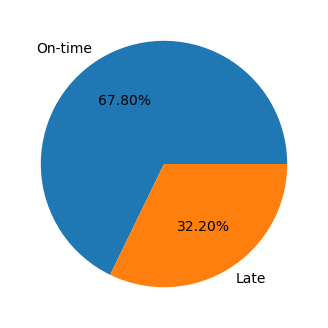

In [421]:
plt.figure(figsize=(4,4))

plt.pie(pd.DataFrame(model.predict(X_test)).value_counts(), 
        labels=['On-time', 'Late'], 
        autopct='%1.2f%%')
plt.show()